<a href="https://colab.research.google.com/github/mohamedfadul/DeepSearch-Finding-Truncated-Differential-Trails-Using-Genetic-Algorithms-and-Deep-Learning/blob/main/Val_Model_ANN_US_DThres_P1_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!wget -O all_dataset_path.csv "https://drive.google.com/uc?export=download&id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz"

--2024-11-03 06:11:27--  https://drive.google.com/uc?export=download&id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz
Resolving drive.google.com (drive.google.com)... 108.177.11.100, 108.177.11.101, 108.177.11.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz&export=download [following]
--2024-11-03 06:11:27--  https://drive.usercontent.google.com/download?id=1vG2C0PM3MXz7p_v5zMSjvodRsK6hbrnz&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2547566 (2.4M) [application/octet-stream]
Saving to: ‘all_dataset_path.csv’

all_dataset_path.cs 100%[===================>]   2.43M  

In [ ]:
all_dataset = pd.read_csv ('all_dataset_path.csv')

In [ ]:
# Normalize the 'sboxes' and 'round' features
all_dataset['sboxes'] = all_dataset['sboxes'] / (all_dataset['round'] * 8)
all_dataset['round'] = (all_dataset['round'])/100

In [ ]:
dataset = all_dataset.sample(frac=0.96,random_state=0)
test_dataset = all_dataset.drop(dataset.index)

In [ ]:
# Class count
count_class_0, count_class_1 = dataset.validity.value_counts()

# Divide by class
df_class_0 = dataset[dataset['validity'] == 0]
df_class_1 = dataset[dataset['validity'] == 1]

In [ ]:
#UnderSampling
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
train_dataset = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(train_dataset.validity.value_counts())

Random under-sampling:
validity
0    1023
1    1023
Name: count, dtype: int64


In [ ]:
train_labels = train_dataset.pop("validity")
test_labels = test_dataset.pop("validity")

In [ ]:
from keras.layers import Dropout
from keras import regularizers
from keras.regularizers import l2, l1
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

reg_param=0.001
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        layers.Dense(512, activation='relu' , input_shape=[50]),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
      layers.Dense(1,activation='sigmoid' )
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10,restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, callbacks=[early_stop])
    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = (y_preds > 0.5).astype(int)  # Binarize predictions

    print("Classification Report: \n", classification_report(y_test, y_preds))
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_preds)
    # Plot the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Print details for each class
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"True Negatives (Class 0 predicted correctly): {tn}")
    print(f"False Positives (Class 0 incorrectly predicted as Class 1): {fp}")
    print(f"False Negatives (Class 1 incorrectly predicted as Class 0): {fn}")
    print(f"True Positives (Class 1 predicted correctly): {tp}")

    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6973 - loss: 0.5409
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8994 - loss: 0.2697
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9345 - loss: 0.1632
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9529 - loss: 0.1198
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9484 - loss: 0.1404
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9420 - loss: 0.1574
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9290 - loss: 0.1676
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9151 - loss: 0.2234
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9455 - loss: 0.1533
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9313 - loss: 0.1881
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9621 - loss: 0.1023
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

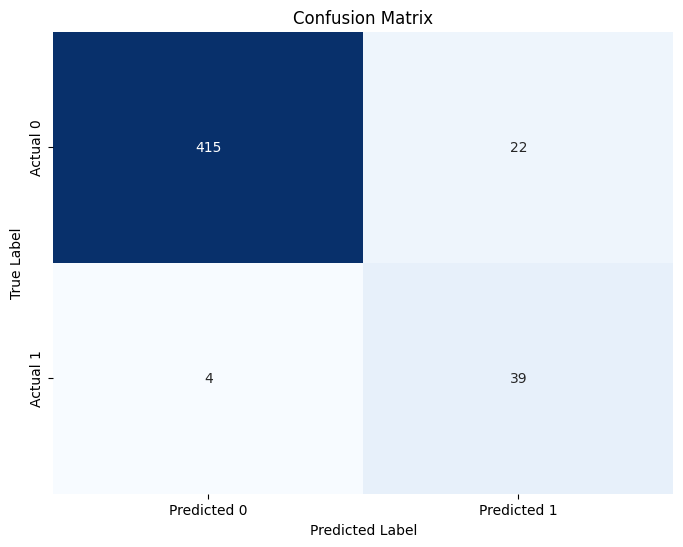

True Negatives (Class 0 predicted correctly): 415
False Positives (Class 0 incorrectly predicted as Class 1): 22
False Negatives (Class 1 incorrectly predicted as Class 0): 4
True Positives (Class 1 predicted correctly): 39


In [ ]:
model = ANN(train_dataset, train_labels, test_dataset, test_labels, tf.keras.losses.BinaryCrossentropy())